In [2]:
import pandas as pd
import torch
import os
f = os.path.join ("reports/Exp6_TCGA_RNA_METH/predicted_latent_space.parquet")
df = pd.read_parquet(f)

In [7]:
f = os.path.join("data/raw/data_clinical_formatted.parquet")
clin = pd.read_parquet(f)
clin.head()

,PATIENT_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,TISSUE_PROSPECTIVE_COLLECTION_INDICATOR,TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR,TISSUE_SOURCE_SITE_CODE,TUMOR_TISSUE_SITE,...,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS,AJCC_PATHOLOGIC_TUMOR_STAGE_SHORT
SAMPLE_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-3X-AAV9-01,TCGA-3X-AAV9,IHCH,Cholangiocarcinoma,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,Yes,No,3X,Bile Duct,...,Yes,1:DECEASED,11.145083,1:DEAD WITH TUMOR,11.145083,1:Recurred/Progressed,7.101292,1:PROGRESSION,7.101292,STAGE I
TCGA-3X-AAVA-01,TCGA-3X-AAVA,IHCH,Cholangiocarcinoma,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,Yes,No,3X,Bile Duct,...,Yes,1:DECEASED,14.629977,1:DEAD WITH TUMOR,14.629977,1:Recurred/Progressed,8.679357,1:PROGRESSION,8.679357,STAGE II
TCGA-3X-AAVB-01,TCGA-3X-AAVB,CHOL,Cholangiocarcinoma,Cholangiocarcinoma,"Cholangiocarcinoma, Distal",G1,No,Yes,3X,Bile Duct,...,Yes,0:LIVING,13.216294,0:ALIVE OR DEAD TUMOR FREE,13.216294,unknown,NaN,0:CENSORED,13.216294,STAGE IV
TCGA-3X-AAVC-01,TCGA-3X-AAVC,PHCH,Cholangiocarcinoma,Perihilar Cholangiocarcinoma,"Cholangiocarcinoma, Hilar/Perihilar",G3,No,Yes,3X,Bile Duct,...,Yes,0:LIVING,23.309334,0:ALIVE OR DEAD TUMOR FREE,23.309334,0:DiseaseFree,23.309334,0:CENSORED,23.309334,STAGE I
TCGA-3X-AAVE-01,TCGA-3X-AAVE,IHCH,Cholangiocarcinoma,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,Yes,No,3X,Bile Duct,...,Yes,0:LIVING,21.369629,0:ALIVE OR DEAD TUMOR FREE,21.369629,0:DiseaseFree,21.369629,0:CENSORED,21.369629,STAGE II


In [4]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
TO_TCGA-AA-3845-01,0.568812,0.240654,0.193729,0.452494,-0.427438,2.217470,0.644676,-0.183011,1.933126,2.436269,22.628231,4.006700
TO_TCGA-HU-A4GH-01,3.031567,1.499446,0.285822,1.306422,4.927621,0.748883,0.793793,-1.379930,0.026571,-0.488728,4.906225,3.995657
TO_TCGA-BR-8690-01,0.119736,0.662113,1.329047,-0.540333,-0.358064,-0.930759,-1.777644,1.287472,-0.808947,-0.172898,4.588774,0.092548
TO_TCGA-G9-6366-01,-1.388410,0.250918,-0.508916,0.745297,5.715310,0.731404,-0.341253,0.382571,2.155950,1.461049,-1.194349,-2.022144
TO_TCGA-BH-A1EU-01,-0.100128,0.596695,2.308307,0.712858,0.160328,0.204129,0.409771,-0.038010,0.207590,-0.452893,-0.024166,1.228742


### Compare ML Taks for Varix and X-Modalix

In [12]:
import os
xmodal_id = "Exp6_TCGA_METH_RNA"
varix_id = "Exp6_TCGA_VARIX"
xml_task_file = os.path.join("reports", xmodal_id, "ml_task_performance.txt")
vml_task_file = os.path.join("reports", varix_id, "ml_task_performance.txt")

xml_df = pd.read_csv(xml_task_file, sep="\t")
vml_df = pd.read_csv(vml_task_file, sep="\t")

In [13]:
xml_df.head()

,score_split,CLINIC_PARAM,metric,value,ML_ALG,ML_TYPE,ML_TASK,ML_SUBTASK
0,train,CANCER_TYPE,roc_auc_ovo,0.995339,Linear,classification,PCA,PCA
1,valid,CANCER_TYPE,roc_auc_ovo,0.993660,Linear,classification,PCA,PCA
2,test,CANCER_TYPE,roc_auc_ovo,0.995460,Linear,classification,PCA,PCA
3,train,CANCER_TYPE,roc_auc_ovo,0.994812,RF,classification,PCA,PCA
4,valid,CANCER_TYPE,roc_auc_ovo,0.988389,RF,classification,PCA,PCA


In [14]:
xml_df["ML_TASK"].value_counts()

ML_TASK
PCA            12
Latent_FROM    12
Latent_TO      12
Latent_BOTH    12
Name: count, dtype: int64

In [15]:
vml_df["ML_TASK"].value_counts()

ML_TASK
Latent    12
PCA       12
Name: count, dtype: int64

In [16]:
vml_df.shape

(24, 8)

Analysis complete. Overall plot saved to 'embedding_comparison' directory.
Individual parameter plots saved to subdirectories in 'embedding_comparison'.
Created plots for the following parameters: CANCER_TYPE, GRADE


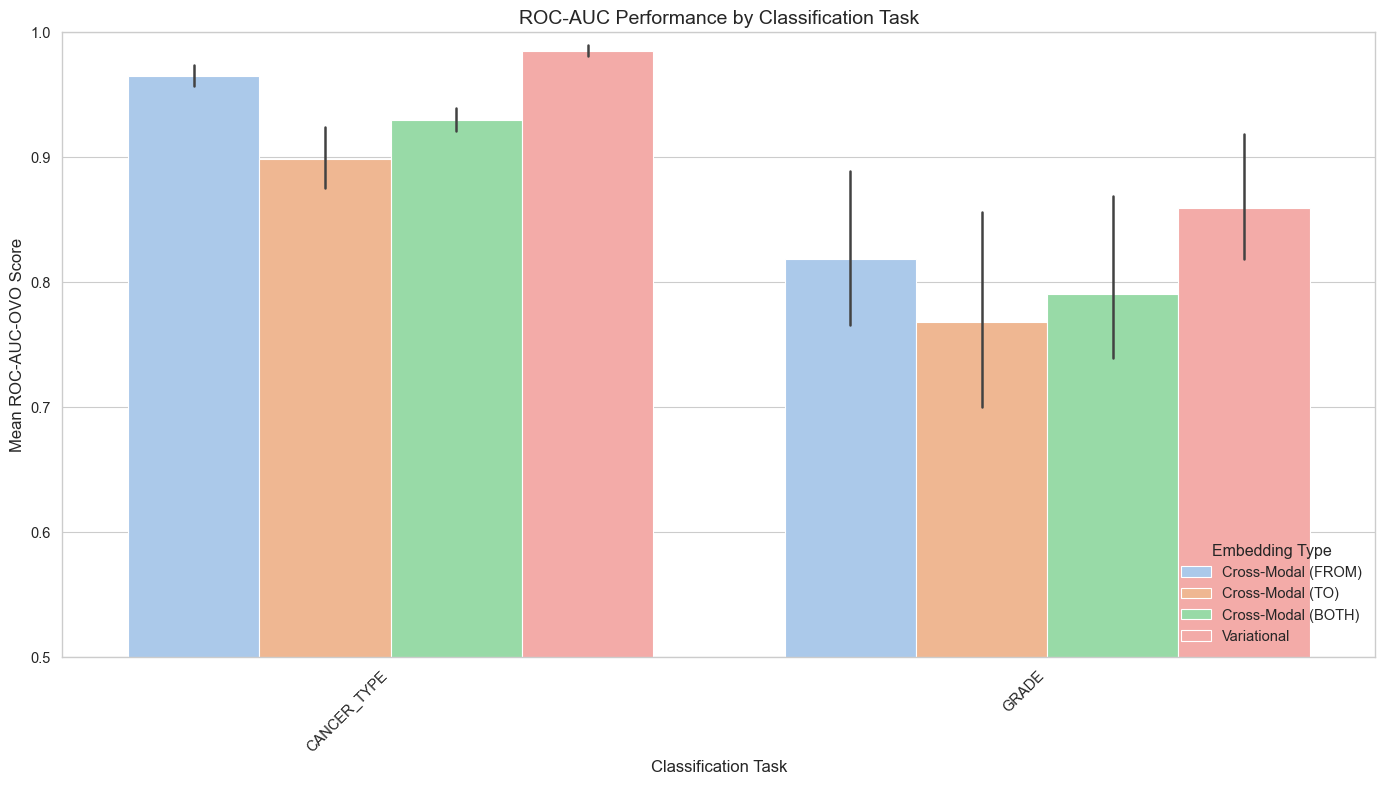

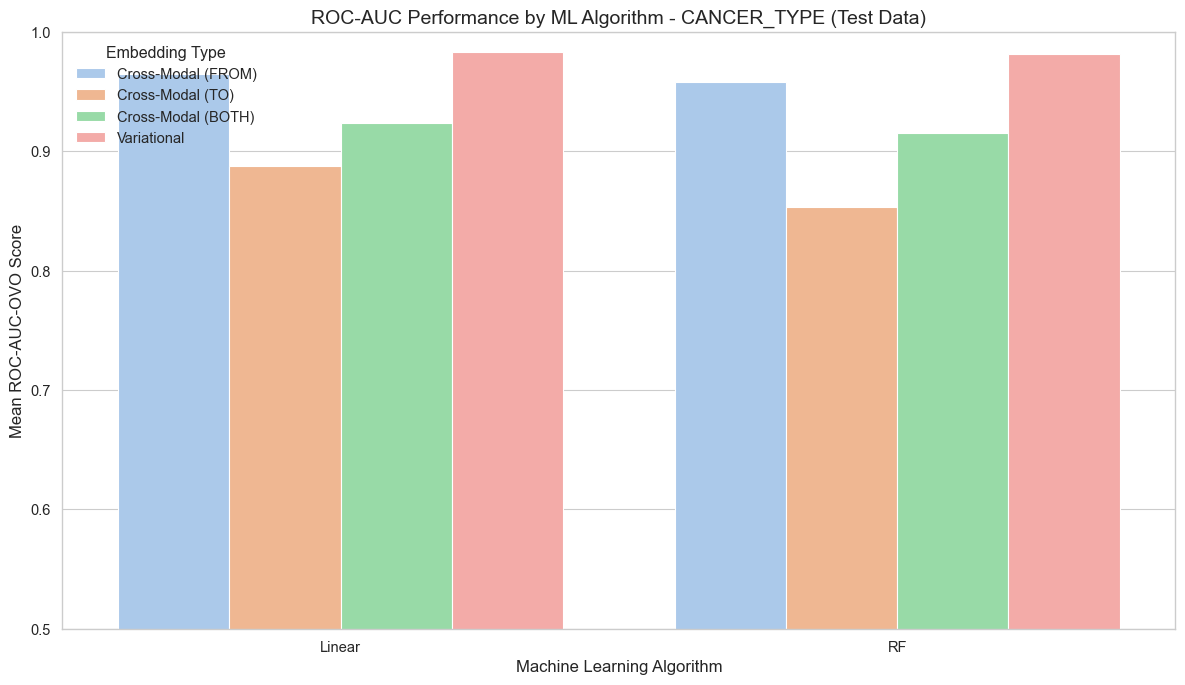

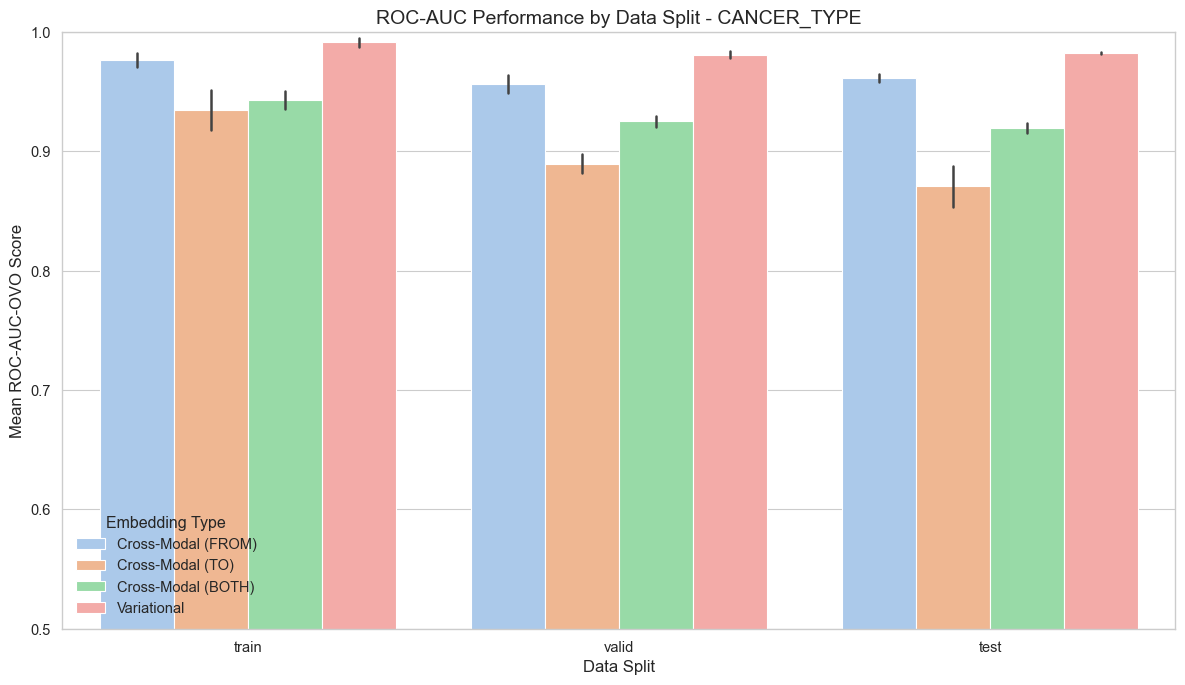

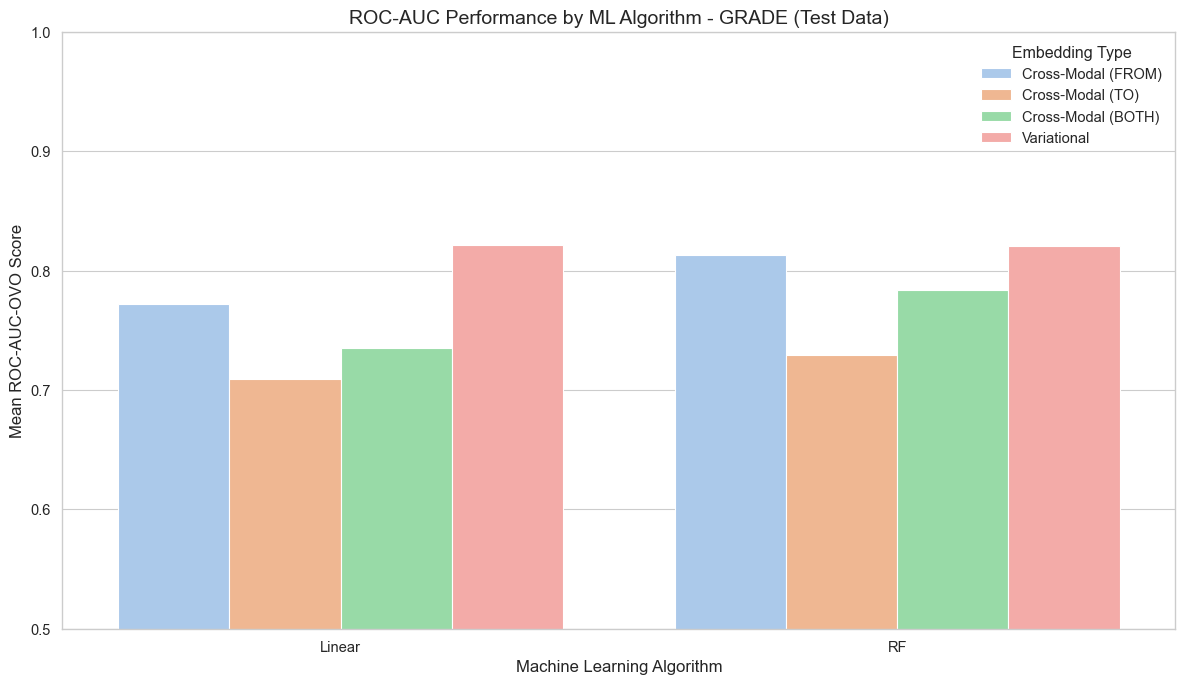

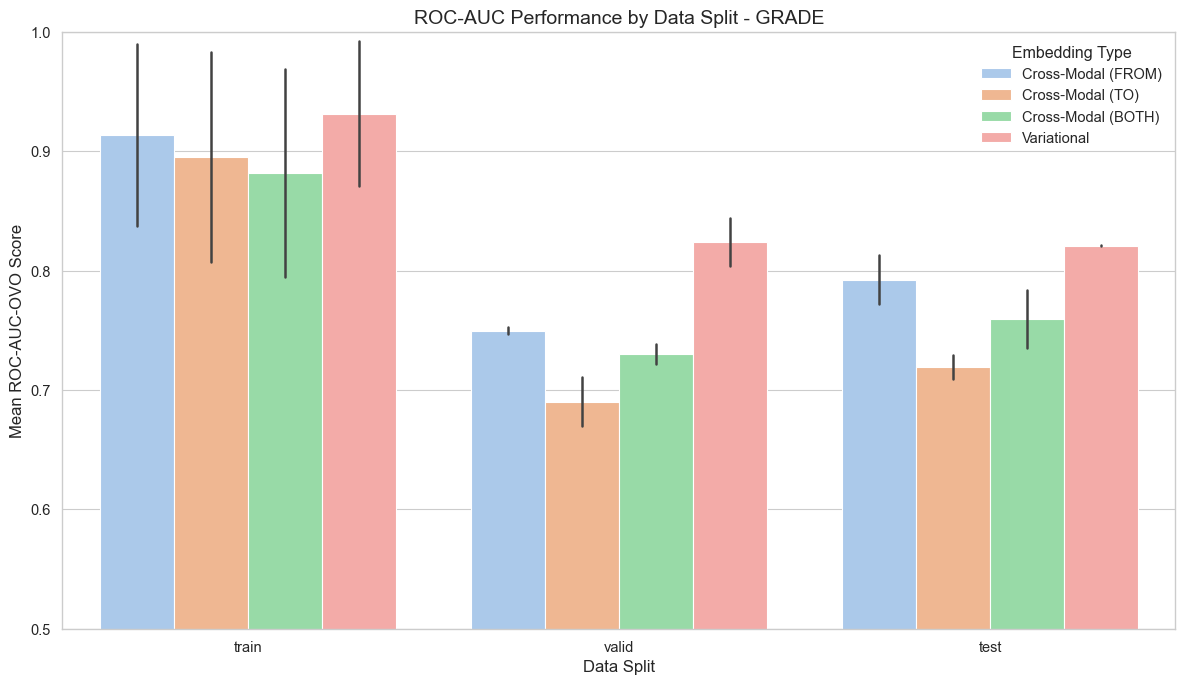

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Filter for all relevant embedding types
xml_from_df = xml_df[xml_df['ML_TASK'] == 'Latent_FROM'].copy()
xml_to_df = xml_df[xml_df['ML_TASK'] == 'Latent_TO'].copy()
xml_both_df = xml_df[xml_df['ML_TASK'] == 'Latent_BOTH'].copy()
vml_latent_df = vml_df[vml_df['ML_TASK'] == 'Latent'].copy()

# Add a column to identify the embedding source
xml_from_df['Embedding'] = 'Cross-Modal (FROM)'
xml_to_df['Embedding'] = 'Cross-Modal (TO)'
xml_both_df['Embedding'] = 'Cross-Modal (BOTH)'
vml_latent_df['Embedding'] = 'Variational'

# Combine the dataframes for easier comparison
combined_df = pd.concat([xml_from_df, xml_to_df, xml_both_df, vml_latent_df], ignore_index=True)

# Set up the plot style using seaborn whitegrid
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.2)

# Create a directory for saving the plots
output_dir = "embedding_comparison"
os.makedirs(output_dir, exist_ok=True)

# 1. Single plot comparing all classification tasks (using all data, not just test)
plt.figure(figsize=(14, 8))
task_order = combined_df.groupby('CLINIC_PARAM')['value'].mean().sort_values(ascending=False).index
sns.barplot(x='CLINIC_PARAM', y='value', hue='Embedding', data=combined_df, 
            palette='pastel', order=task_order)
plt.title('ROC-AUC Performance by Classification Task', fontsize=14)
plt.ylabel('Mean ROC-AUC-OVO Score', fontsize=12)
plt.xlabel('Classification Task', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 1.0)
plt.legend(title='Embedding Type', loc='lower right')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'performance_by_task.png'), dpi=300)

# 2. Separate plots for each CLINIC_PARAM (only using test data)
# Get unique CLINIC_PARAM values
clinic_params = combined_df['CLINIC_PARAM'].unique()

for param in clinic_params:
    # Filter data for the current parameter and only test data for ML algorithm plot
    param_df = combined_df[combined_df['CLINIC_PARAM'] == param]
    param_test_df = param_df[param_df['score_split'] == 'test']
    
    # Create directory for this parameter if it doesn't exist
    param_dir = os.path.join(output_dir, param)
    os.makedirs(param_dir, exist_ok=True)
    
    # A. Performance by ML Algorithm for this parameter (test data only)
    plt.figure(figsize=(12, 7))
    sns.barplot(x='ML_ALG', y='value', hue='Embedding', data=param_test_df, palette='pastel')
    plt.title(f'ROC-AUC Performance by ML Algorithm - {param} (Test Data)', fontsize=14)
    plt.ylabel('Mean ROC-AUC-OVO Score', fontsize=12)
    plt.xlabel('Machine Learning Algorithm', fontsize=12)
    plt.ylim(0.5, 1.0)
    plt.legend(title='Embedding Type')
    plt.tight_layout()
    plt.savefig(os.path.join(param_dir, f'performance_by_algorithm_{param}.png'), dpi=300)
    # plt.close()
    
    # B. Performance by Data Split for this parameter (all data - train/valid/test)
    plt.figure(figsize=(12, 7))
    sns.barplot(x='score_split', y='value', hue='Embedding', data=param_df, 
                palette='pastel', order=['train', 'valid', 'test'])
    plt.title(f'ROC-AUC Performance by Data Split - {param}', fontsize=14)
    plt.ylabel('Mean ROC-AUC-OVO Score', fontsize=12)
    plt.xlabel('Data Split', fontsize=12)
    plt.ylim(0.5, 1.0)
    plt.legend(title='Embedding Type')
    plt.tight_layout()
    plt.savefig(os.path.join(param_dir, f'performance_by_split_{param}.png'), dpi=300)
    # plt.close()

print(f"Analysis complete. Overall plot saved to '{output_dir}' directory.")
print(f"Individual parameter plots saved to subdirectories in '{output_dir}'.")
print(f"Created plots for the following parameters: {', '.join(clinic_params)}")

### PCA input output

In [ ]:
rna_rna_recon = "reports/Exp6_TCGA_RNA_RNA/translated.txt"
meth_rna_recon = "reports/Exp6_TCGA_METH_RNA/translated.txt"
rna_proc_input = "data/processed/Exp6_TCGA_METH_RNA/RNA_data.parquet"
clinical_file = "data/raw/data_clinical_formatted.parquet"
clinic_param = "CANCER_TYPE"

clin_df = pd.read_parquet(clinical_file)
rna_rna_recon_df = pd.read_csv(rna_rna_recon, sep="\t", index_col=0)
meth_rna_recon_df = pd.read_csv(meth_rna_recon, sep="\t", index_col=0)
rna_input_df = pd.read_parquet(rna_proc_input)


clin_df head:                    PATIENT_ID ONCOTREE_CODE         CANCER_TYPE  \
SAMPLE_ID                                                         
TCGA-3X-AAV9-01  TCGA-3X-AAV9          IHCH  Cholangiocarcinoma   
TCGA-3X-AAVA-01  TCGA-3X-AAVA          IHCH  Cholangiocarcinoma   
TCGA-3X-AAVB-01  TCGA-3X-AAVB          CHOL  Cholangiocarcinoma   
TCGA-3X-AAVC-01  TCGA-3X-AAVC          PHCH  Cholangiocarcinoma   
TCGA-3X-AAVE-01  TCGA-3X-AAVE          IHCH  Cholangiocarcinoma   

                            CANCER_TYPE_DETAILED  \
SAMPLE_ID                                          
TCGA-3X-AAV9-01  Intrahepatic Cholangiocarcinoma   
TCGA-3X-AAVA-01  Intrahepatic Cholangiocarcinoma   
TCGA-3X-AAVB-01               Cholangiocarcinoma   
TCGA-3X-AAVC-01     Perihilar Cholangiocarcinoma   
TCGA-3X-AAVE-01  Intrahepatic Cholangiocarcinoma   

                                          TUMOR_TYPE GRADE  \
SAMPLE_ID                                                    
TCGA-3X-AAV9-01     Cholang

In [ ]:
print(f"clin_df head: {clin_df.head()}")
print(f"rna_rna_translated_df head: {rna_rna_recon_df.head()}")
print(f"meth_rna_translated_df head: {meth_rna_recon_df.head()}")
print(f"rna_input_df head: {rna_input_df.head()}")

In [ ]:
import numpy as np

def plot_latent_2D(
    cfg,
    embedding,
    labels,
    param=None,
    layer="latent space",
    figsize=(24, 15),
    center=True,
    save_fig="",
    xlim=None,
    ylim=None,
    scale=None,
    no_leg=False,
):
    """
    Creates a 2D visualization of the 2D embedding of the latent space.
    ARGS:
        cfg (dict): config dictionary
        embedding (pd.DataFrame): embedding on which is visualized. Assumes prior 2D dimension reduction.
        labels (list): Clinical parameters or cluster labels to colorize samples (points)
        layer (str): Label for plot title to indicate which network layer is represented by UMAP/TSNE
        figsize (tuple): Figure size specification.
        center (boolean): If True (default) centers of clusters/groups are visualized as stars.
        save_fig (str): File path for saving the plot. Use appropriate file
                        endings to specify image type (e.g. '*.png')
    RETURNS:
        fig (matplotlib.figure): Figure handle

    """
    logger = getlogger(cfg)
    numeric = False
    if not (type(labels[0]) is str):
        if len(np.unique(labels)) > 3:
            if not cfg["PLOT_NUMERIC"]:
                logger.info(
                    f"The provided label column is numeric and converted to categories."
                )
                labels = pd.qcut(
                    labels, q=4, labels=["1stQ", "2ndQ", f"3rdQ", f"4thQ"]
                ).astype(str)
            else:
                center = False  ## Disable centering for numeric params
                numeric = True
        else:
            labels = [str(x) for x in labels]

    fig, ax1 = plt.subplots(figsize=figsize)

    # check if label or embedding is longerm and duplicate the shorter one
    if len(labels) < embedding.shape[0]:
        logger.warning(
            "Given labels do not have the same length as given sample size. Labels will be duplicated."
        )
        labels = [
            label for label in labels for _ in range(embedding.shape[0] // len(labels))
        ]
    elif len(labels) > embedding.shape[0]:
        labels = list(set(labels))

    if numeric:
        ax2 = sns.scatterplot(
            x=embedding.iloc[:, 0],
            y=embedding.iloc[:, 1],
            hue=labels,
            palette="bwr",
            s=40,
            alpha=0.8,
            ec="black",
        )
    else:
        ax2 = sns.scatterplot(
            x=embedding.iloc[:, 0],
            y=embedding.iloc[:, 1],
            hue=labels,
            hue_order=np.unique(labels),
            s=40,
            alpha=0.8,
            ec="black",
        )
    if center:
        means = embedding.groupby(by=labels).mean()
        # logger.info(labels)
        # logger.info(means)

        ax2 = sns.scatterplot(
            x=means.iloc[:, 0],
            y=means.iloc[:, 1],
            hue=np.unique(labels),
            hue_order=np.unique(labels),
            s=200,
            ec="black",
            alpha=0.9,
            marker="*",
            legend=False,
            ax=ax2,
        )

    if not xlim == None:
        ax2.set_xlim(xlim[0], xlim[1])

    if not ylim == None:
        ax2.set_ylim(ylim[0], ylim[1])

    if not scale == None:
        plt.yscale(scale)
        plt.xscale(scale)
    ax2.set_xlabel("Dim 1")
    ax2.set_ylabel("Dim 2")
    # ax2.set(title=f'{cfg["DIM_RED_METH"]} of {layer}')
    legend_cols = 1
    if len(np.unique(labels)) > 10:
        legend_cols = 2

    if no_leg:
        plt.legend([], [], frameon=False)
    else:
        sns.move_legend(
            ax2,
            "upper left",
            bbox_to_anchor=(1, 1),
            ncol=legend_cols,
            title=param,
            markerscale=3,
            frameon=False,
        )

    if len(save_fig) > 0:
        fig.savefig(save_fig, bbox_inches="tight")
    return fig


/Users/maximilianjoas/development/autoencodix-reproducibility/venv-gallia/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


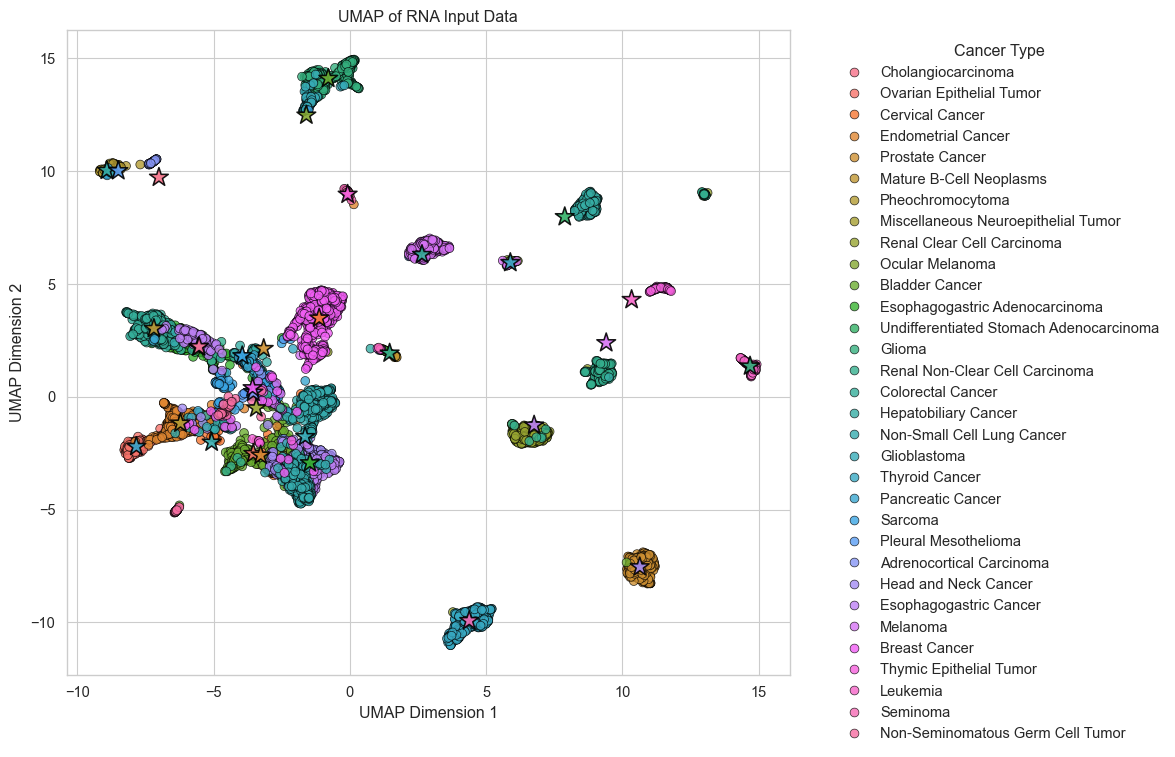

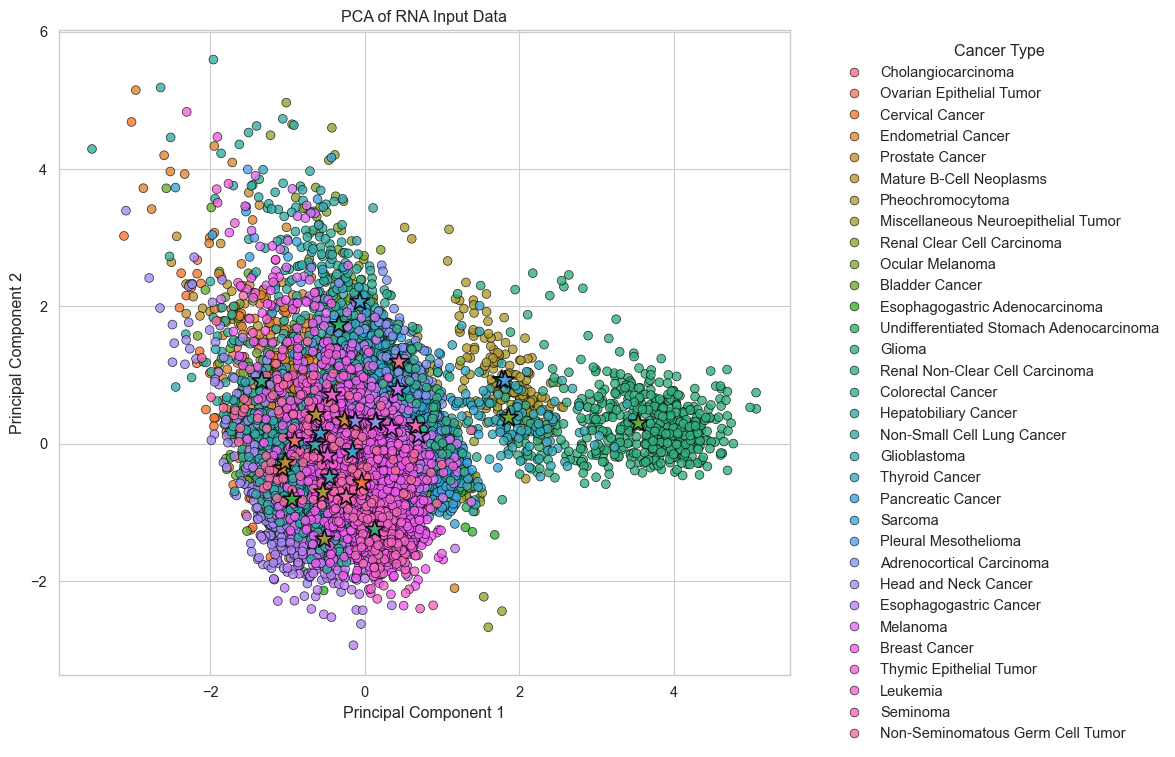

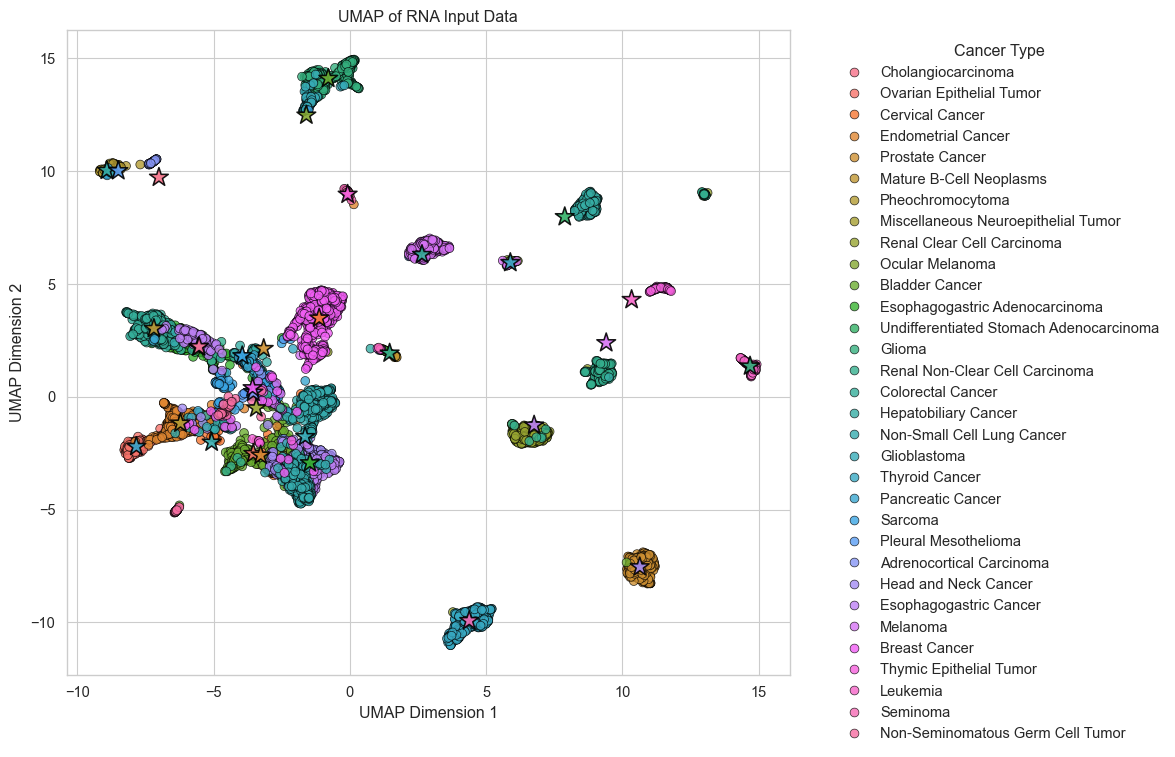

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

def get_pca(data, labels):
    # Perform PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)
    embedding_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=data.index)
    embedding_df["label"] = labels
    return embedding_df  # Return the dataframe

def get_umap(data, labels, random_state=42):
    # Perform UMAP
    import umap
    reducer = umap.UMAP(n_components=2, random_state=random_state)
    umap_result = reducer.fit_transform(data)
    embedding_df = pd.DataFrame(umap_result, columns=["UMAP1", "UMAP2"], index=data.index)
    embedding_df["label"] = labels
    return embedding_df  # Return the dataframe

def plot_embedding_2D(
    data,
    labels,
    title="PCA Plot",
    figsize=(12, 8),
    save_fig="",
    center=True,
    no_leg=False,
):
    """
    Creates a 2D embedding visualization of the input data.
    ARGS:
        data (pd.DataFrame): DataFrame containing the embedding coordinates.
        labels (pd.Series): Labels for coloring the points (e.g., cancer types).
        title (str): Title for the plot.
        figsize (tuple): Figure size specification.
        save_fig (str): File path for saving the plot.
        center (bool): If True, centers of groups are visualized as stars.
        no_leg (bool): If True, disables the legend.
    RETURNS:
        fig (matplotlib.figure): Figure handle.
    """
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    unique_labels = np.unique(labels)
    palette = sns.color_palette("husl", len(unique_labels))
    
    # Determine the column names for x and y
    # Check if it's PCA or UMAP data based on column names
    if "PC1" in data.columns:
        x_col = "PC1"
        y_col = "PC2"
        x_label = "Principal Component 1"
        y_label = "Principal Component 2"
    elif "UMAP1" in data.columns:
        x_col = "UMAP1"
        y_col = "UMAP2"
        x_label = "UMAP Dimension 1"
        y_label = "UMAP Dimension 2"
    else:
        # Default to the first two columns if neither PCA nor UMAP
        x_col = data.columns[0]
        y_col = data.columns[1]
        x_label = x_col
        y_label = y_col
    
    sns.scatterplot(
        x=x_col,
        y=y_col,
        hue="label",
        data=data,
        palette=palette,
        s=40,
        alpha=0.8,
        edgecolor="black",
        ax=ax,
    )
    
    if center:
        means = data.groupby("label")[[x_col, y_col]].mean()
        sns.scatterplot(
            x=means[x_col],
            y=means[y_col],
            hue=means.index,
            palette=palette,
            s=200,
            edgecolor="black",
            alpha=0.9,
            marker="*",
            legend=False,
            ax=ax,
        )
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    
    if no_leg:
        ax.legend([], [], frameon=False)
    else:
        ax.legend(title="Cancer Type", bbox_to_anchor=(1.05, 1), loc="upper left")
    
    plt.tight_layout()
    
    if save_fig:
        fig.savefig(save_fig, bbox_inches="tight", dpi=300)
    
    return fig

# Example usage
# Load RNA input data and clinical data
rna_input_df = pd.read_parquet("data/processed/Exp6_TCGA_METH_RNA/RNA_data.parquet")
clinical_df = pd.read_parquet("data/raw/data_clinical_formatted.parquet")

# Match RNA input data with clinical data
rna_input_df = rna_input_df.loc[clinical_df.index.intersection(rna_input_df.index)]
cancer_types = clinical_df.loc[rna_input_df.index, "CANCER_TYPE"]

# Get PCA and UMAP embeddings
rna_input_pca_df = get_pca(rna_input_df, cancer_types)
rna_input_umap_df = get_umap(rna_input_df, cancer_types)

# Plot PCA for RNA input
plot_embedding_2D(
    data=rna_input_pca_df,
    labels=cancer_types,
    title="PCA of RNA Input Data",
    save_fig="rna_input_pca.png",
)

# Plot UMAP for RNA input - Note: Save with a different filename
plot_embedding_2D(
    data=rna_input_umap_df,
    labels=cancer_types,
    title="UMAP of RNA Input Data",
    save_fig="rna_input_umap.png",  # Changed filename to avoid overwriting the PCA plot
)

/Users/maximilianjoas/development/autoencodix-reproducibility/venv-gallia/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


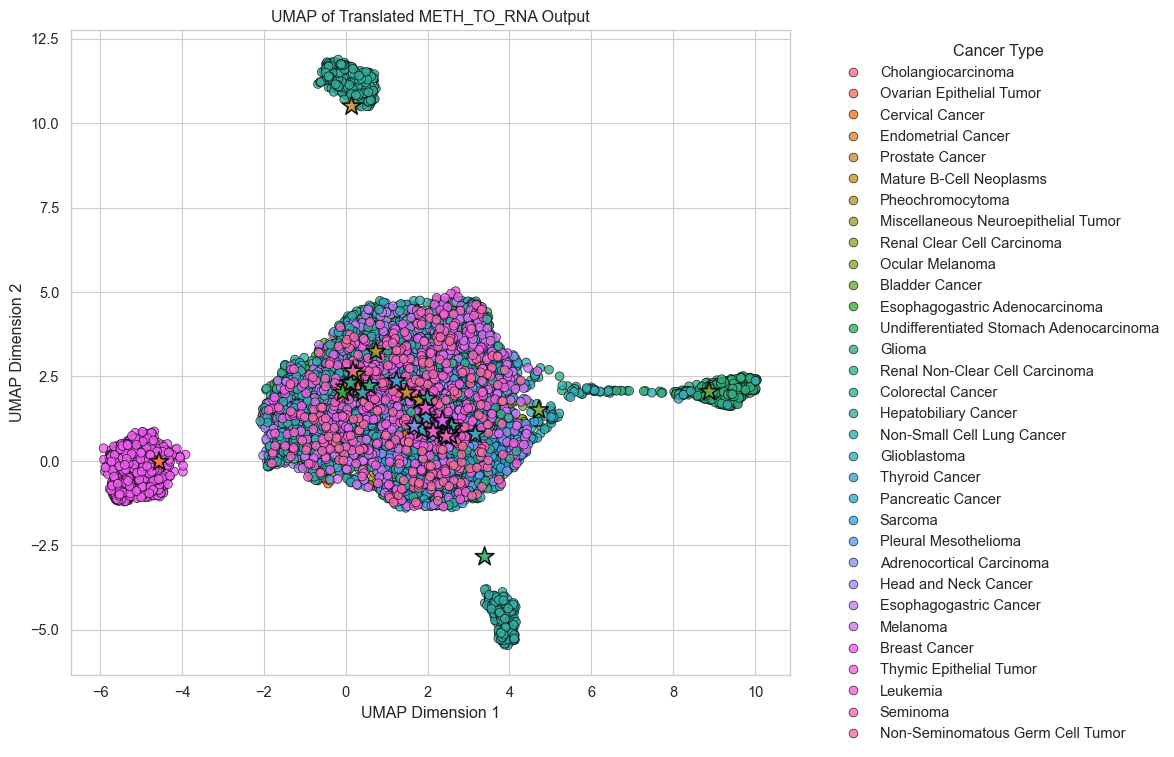

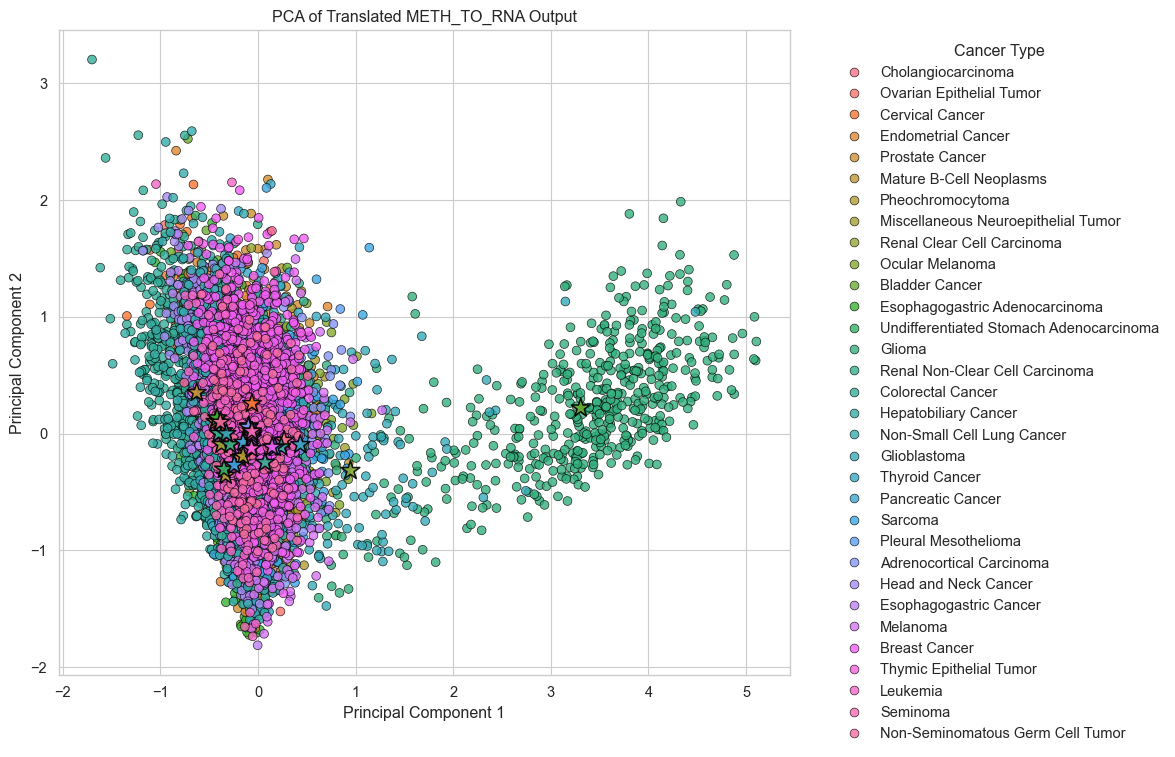

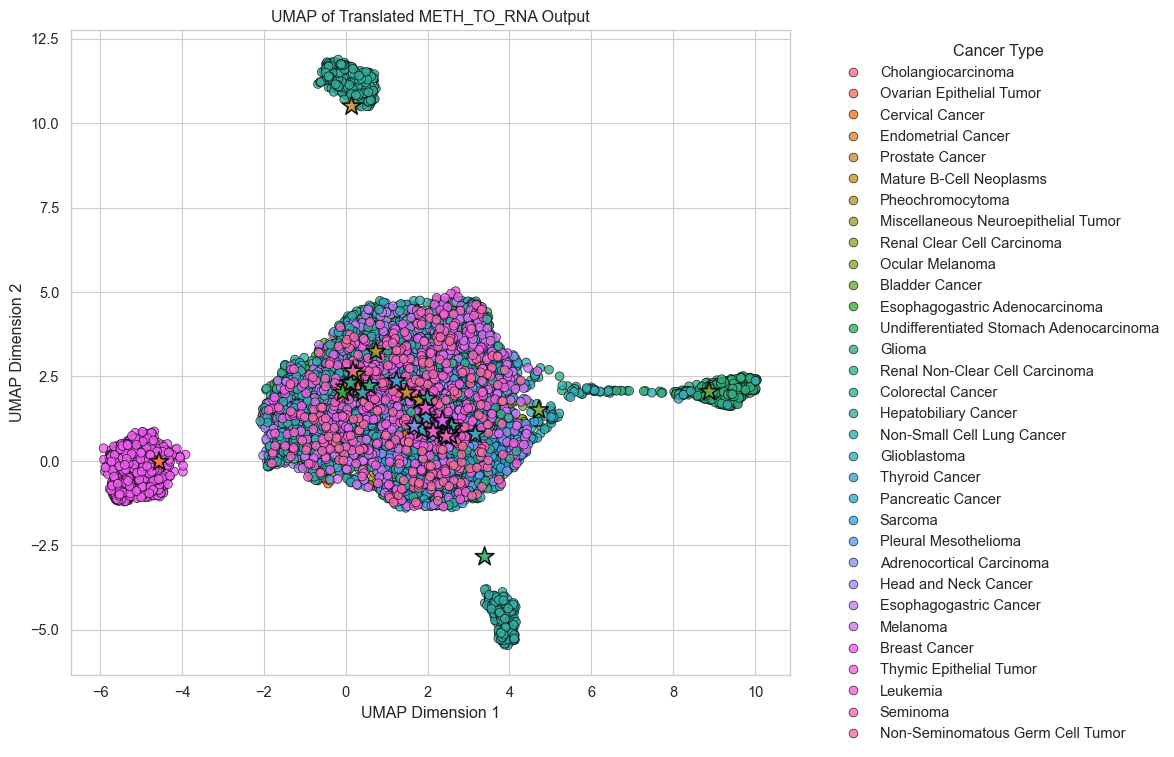

In [43]:
# Load translated output from METH_TO_RNA
meth_to_rna_df = pd.read_csv(
    "reports/Exp6_TCGA_METH_RNA/translated.txt", sep="\t", index_col=0
)

# Match translated output with clinical data
meth_to_rna_df = meth_to_rna_df.loc[clinical_df.index.intersection(meth_to_rna_df.index)]
del meth_to_rna_df["shape"]
cancer_types_translated = clinical_df.loc[meth_to_rna_df.index, "CANCER_TYPE"]
meth_to_rna_pca_df = get_pca(meth_to_rna_df, cancer_types_translated)


# Plot PCA for translated output
plot_embedding_2D(
    data=meth_to_rna_pca_df,
    labels=cancer_types_translated,
    title="PCA of Translated METH_TO_RNA Output",
    save_fig="meth_to_rna_pca.png",
)

meth_to_rna_umap_df = get_umap(meth_to_rna_df, cancer_types_translated)
# Plot UMAP for translated output
plot_embedding_2D(
    data=meth_to_rna_umap_df,
    labels=cancer_types_translated,
    title="UMAP of Translated METH_TO_RNA Output",
    save_fig="meth_to_rna_umap.png",
)

In [33]:
del meth_to_rna_df["shape"]

In [34]:
print(meth_to_rna_df.dtypes)
print(meth_to_rna_df.head())

RNA_213      float64
RNA_7038     float64
RNA_1277     float64
RNA_1113     float64
RNA_5265     float64
              ...   
RNA_6232     float64
RNA_55608    float64
RNA_10725    float64
RNA_215      float64
RNA_5272     float64
Length: 4000, dtype: object
                  RNA_213  RNA_7038  RNA_1277  RNA_1113  RNA_5265  RNA_1114  \
TCGA-3X-AAV9-01  0.030713  0.014102  0.005202  0.039964  0.011361  0.047264   
TCGA-3X-AAVA-01  0.023632  0.018149  0.033712  0.020630  0.006254  0.028653   
TCGA-3X-AAVB-01 -0.025232  0.006401  0.025296  0.021414  0.009704 -0.012595   
TCGA-3X-AAVC-01  0.012636  0.012535  0.015107  0.005763  0.014835  0.006556   
TCGA-3X-AAVE-01 -0.002376 -0.034144  0.011427 -0.000775 -0.003457  0.018308   

                 RNA_2670  RNA_3240  RNA_2335  RNA_8755  ...  RNA_8862  \
TCGA-3X-AAV9-01  0.004259  0.045180  0.026665  0.047766  ...  0.052486   
TCGA-3X-AAVA-01  0.014765 -0.028082  0.029339  0.005677  ... -0.005818   
TCGA-3X-AAVB-01  0.011534 -0.027809  0.02186